In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

17176


In [2]:
save_filename = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\20220316-P_brain_CTP11-12-13_from_0304\Conv_zscan_020.hdf5'

In [83]:
#combo_ims 

with h5py.File(save_filename, 'r') as _f:
    sel_inds = np.array([0,1,2,9])
    combo_ims = _f['combo/ims'][sel_inds]
    combo_ids = _f['combo/ids'][sel_inds]
    combo_raw_spots = [_s[_s[:,0]>0] for _s in _f['combo/raw_spots'][sel_inds]]

In [84]:
## visualize
coord_dict = {'coords':[],
              'class_ids':[],
             }
for _i, _spots in enumerate(combo_raw_spots):
    _sel_flags = (_spots[:,2] >= 1170) * (_spots[:,2] <= 1330) * (_spots[:,3] >= 1050) * (_spots[:,3] <= 1210)
    
    _sel_spots = _spots[_sel_flags].copy()
    _sel_spots[:,2] = _sel_spots[:,2] - 1170
    _sel_spots[:,3] = _sel_spots[:,3] - 1050

    coord_dict['coords'] += list(np.flipud(_spot[1:4]) for _spot in _sel_spots)
    coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))

 

C:\Users\puzheng\AppData\Local\Temp/ipykernel_17176/2947231320.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coord_dict['class_ids'] += list(_i * np.ones(len(_sel_spots),dtype=np.int))


In [85]:
from ImageAnalysis3.figure_tools import _dpi,_single_col_width,_double_col_width,_single_row_height,_ref_bar_length, _ticklabel_size,_ticklabel_width,_font_size
plt.style.use('dark_background')


<IPython.core.display.Javascript object>


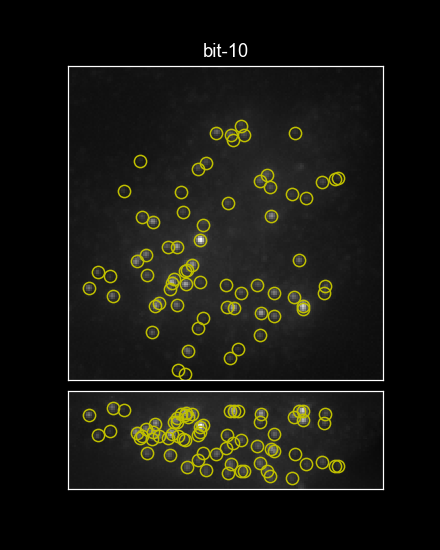

In [86]:
reload(visual_tools)

cls = visual_tools.imshow_mark_3d_v2(combo_ims[:,:,1170:1330,1050:1210], 
                                     image_names=[f"bit-{_bit}" for _bit in combo_ids],
                                     given_dic=coord_dict,
                                     show_ticks=False, min_max_default=[5000,None],
                                     )

<IPython.core.display.Javascript object>


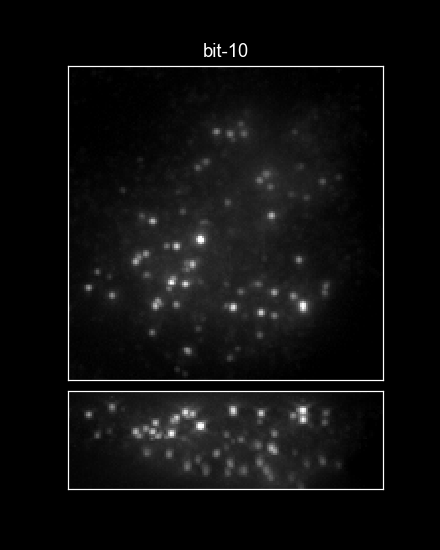

In [90]:
reload(visual_tools)

cls = visual_tools.imshow_mark_3d_v2(combo_ims[:,:,1170:1330,1050:1210], 
                                     image_names=[f"bit-{_bit}" for _bit in combo_ids],
                                     show_ticks=False, min_max_default=[5000,None],
                                     )

In [102]:
figure_folder = r'D:\20220611-Plots'
spots_figure_folder = os.path.join(figure_folder, 'SpotImage')
if not os.path.exists(spots_figure_folder):
    os.makedirs(spots_figure_folder)

<IPython.core.display.Javascript object>


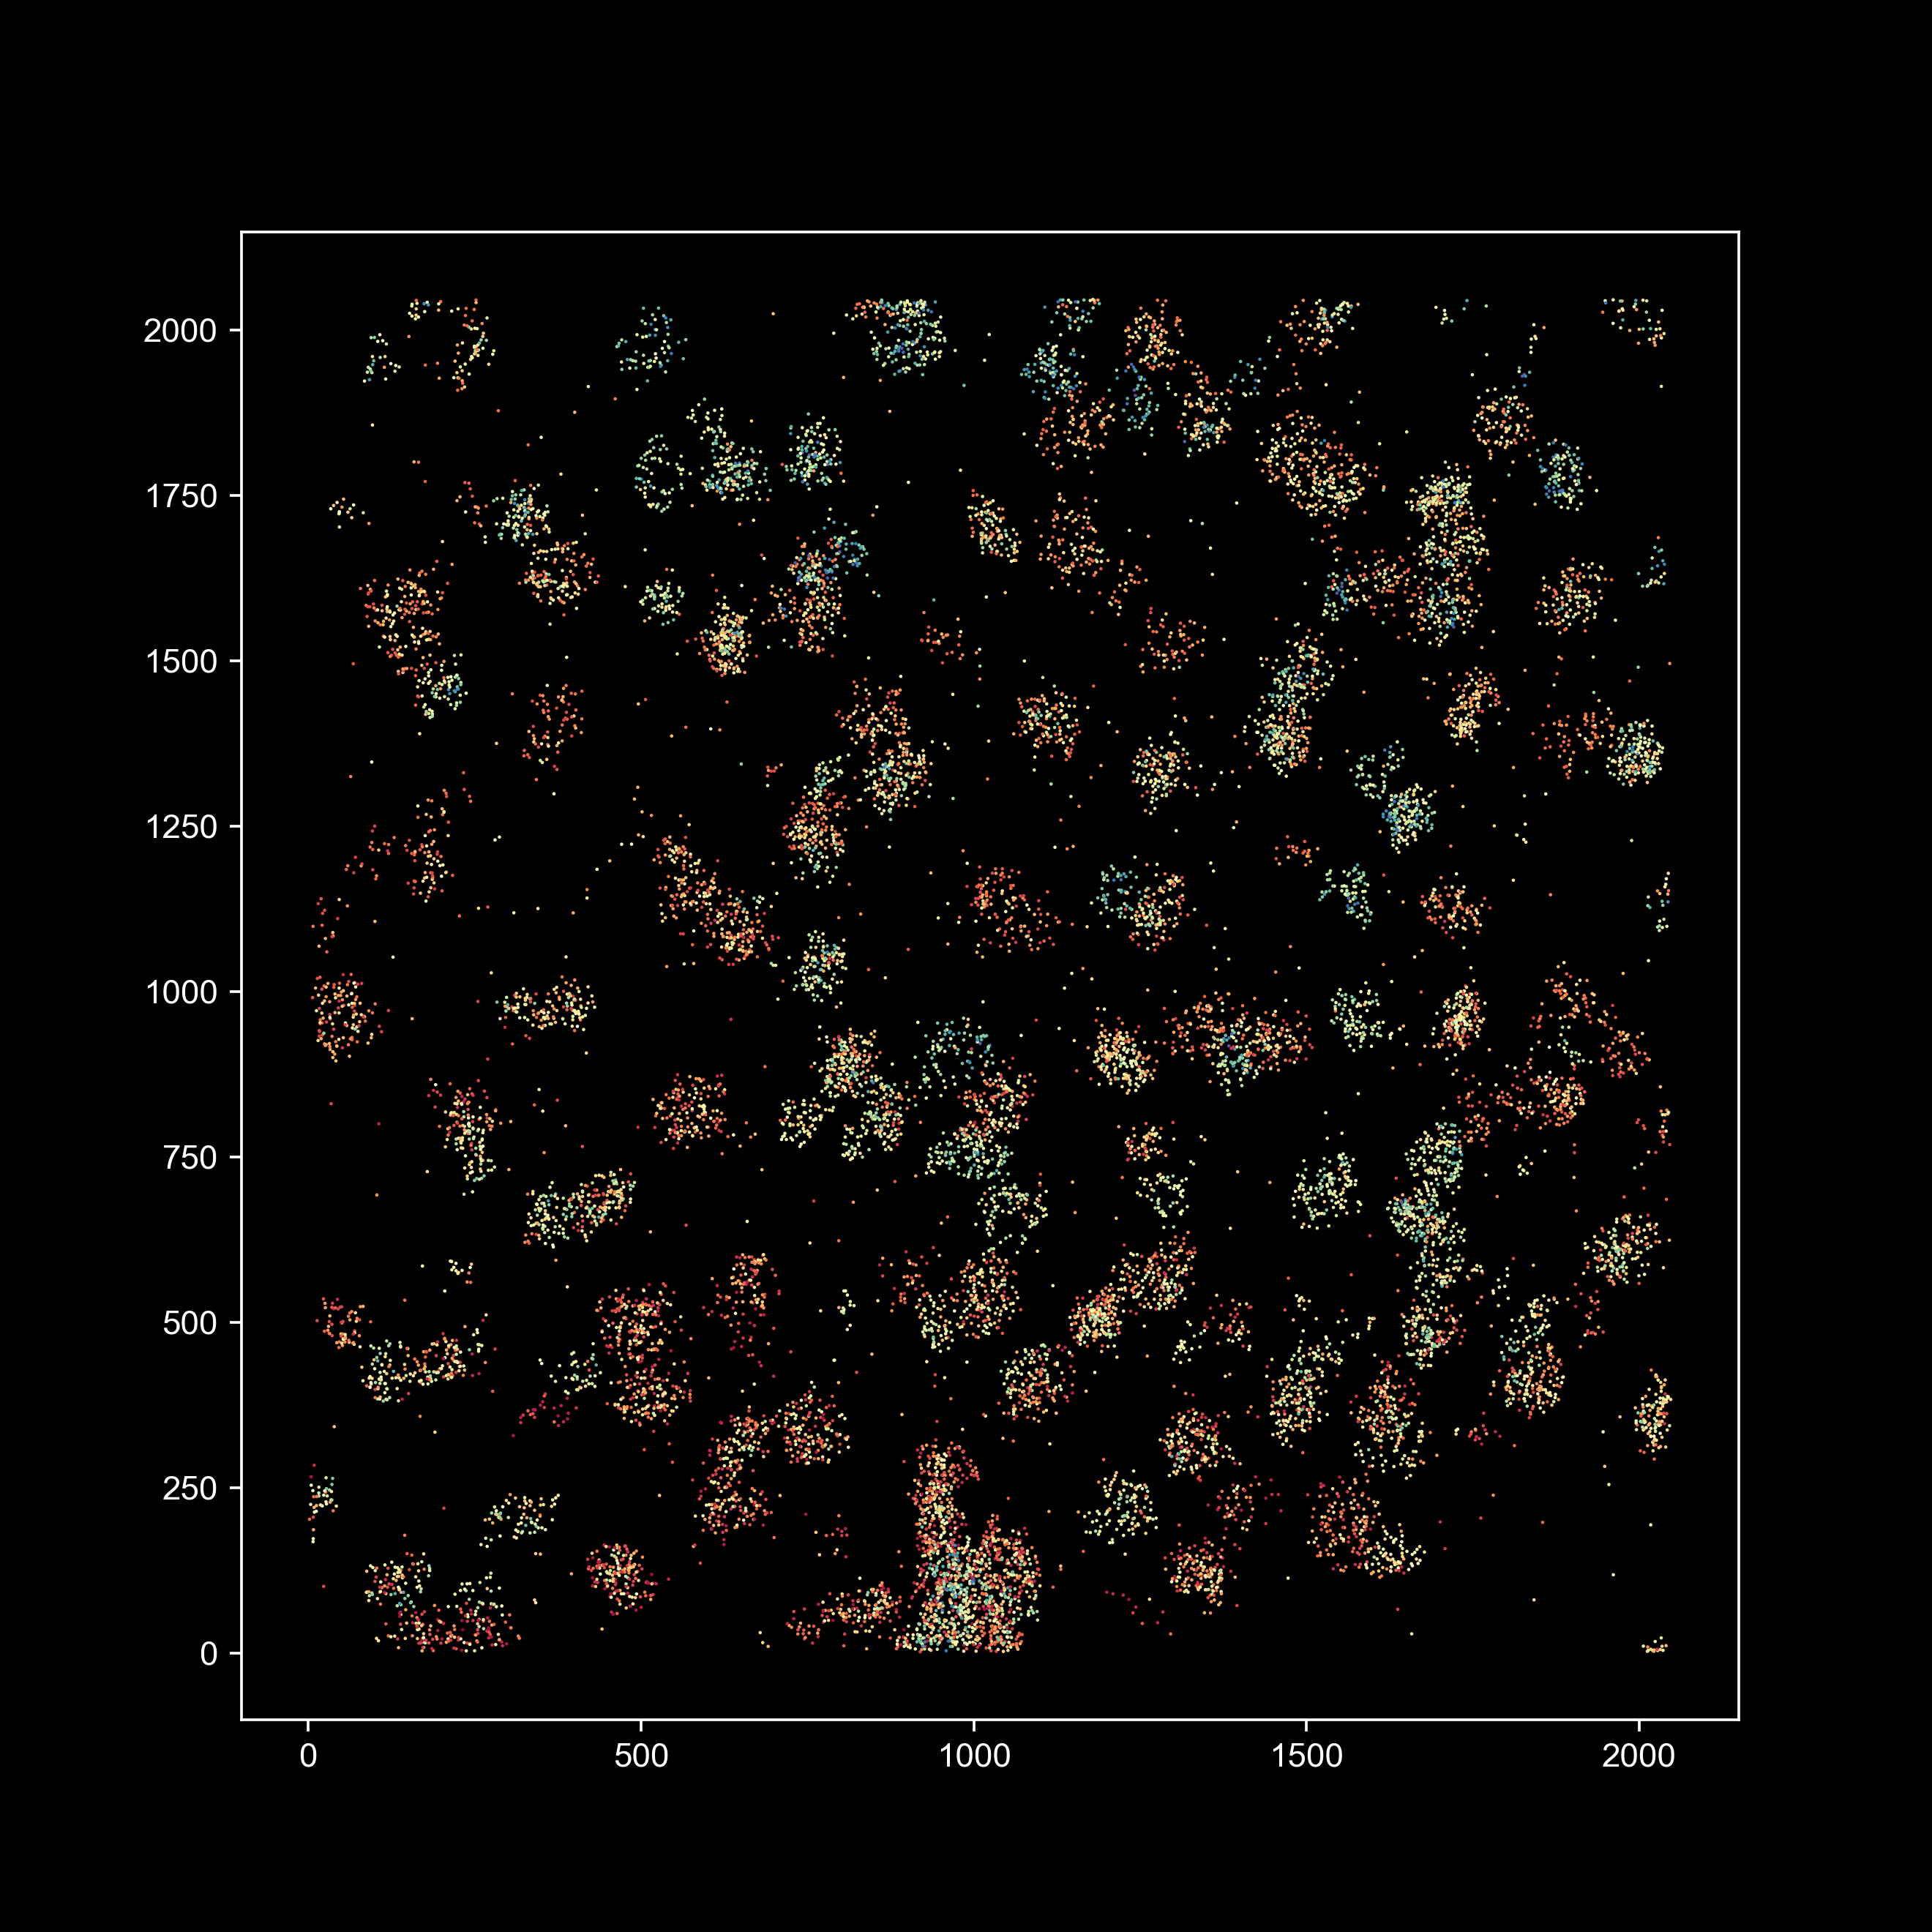

In [106]:
# scatter plot
fig, ax = plt.subplots(figsize=(8,8),dpi=300)
ax.scatter(combo_raw_spots[1][:,2], combo_raw_spots[1][:,3], s=1, 
           c=combo_raw_spots[1][:,1], cmap='Spectral', linewidths=0)
ax.scatter(combo_raw_spots[2][:,2], combo_raw_spots[2][:,3], s=1, 
           c=combo_raw_spots[2][:,1], cmap='Spectral', linewidths=0)
fig.savefig(os.path.join(spots_figure_folder, 'Spots2D.png'), transparent=False)